# Data Science Job Salary

Veri bilimi pozisyonundaki kiÅŸilerin maaÅŸlarÄ±nÄ± inceleyeceÄŸiz.

<img src="Salary-Range.png" width="%100"/>

### About Dataset

Bu veri kÃ¼mesi, iÅŸin adÄ±, iÅŸin tÃ¼rÃ¼, deneyim dÃ¼zeyi, iÅŸin yeri, para birimi ile maaÅŸ bilgilerini iÃ§erir.

DataSource: https://www.kaggle.com/datasets/milanvaddoriya/data-science-job-salary

### Importing Libraries

In [10]:
#pip install tensorflow

  Using cached tensorflow-2.12.0rc0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0rc0-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.8.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached jax-0.4.4.tar.gz (1.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.51.3-cp311-cp311-win_amd64.whl (3.7 MB)
  Using cached tensorboard-2.12.0-py3-none-any.whl (5.6 MB)
  Using cached keras-2.12.0rc1-py2.py3-none-any.whl (1.7 MB)
  Using cached google_auth-2.16.1-py2.py3-none-any.whl (177 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.4.1-py3-none-any


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
df=pd.read_csv("datascience_salaries.csv")

In [13]:
df

Unnamed: 0       job_title    job_type experience_level       location  \
0              0  Data scientist   Full Time           Senior  New York City   
1              2  Data scientist   Full Time           Senior         Boston   
2              3  Data scientist   Full Time           Senior         London   
3              4  Data scientist   Full Time           Senior         Boston   
4              5  Data scientist   Full Time           Senior  New York City   
...          ...             ...         ...              ...            ...   
1166        2243          ML Ops   Full Time           Senior        Toronto   
1167        2249          ML Ops   Full Time           Senior         Boston   
1168        2250          ML Ops   Full Time           Senior          Delhi   
1169        2255          ML Ops   Full Time           Senior  San Francisco   
1170        2259          ML Ops  Internship           Senior  New York City   

     salary_currency  salary  
0                USD  149000  
1                USD  120000  
2                USD   68000  
3                USD  120000  
4                USD  149000  
...              ...     ...  
1166             USD  228000  
1167             USD  115000  
1168             USD   76000  
1169             USD   68000  
1170             USD  135000  

[1171 rows x 7 columns]

### Data Analysis

In [15]:
df=df.drop("Unnamed: 0",axis=1)

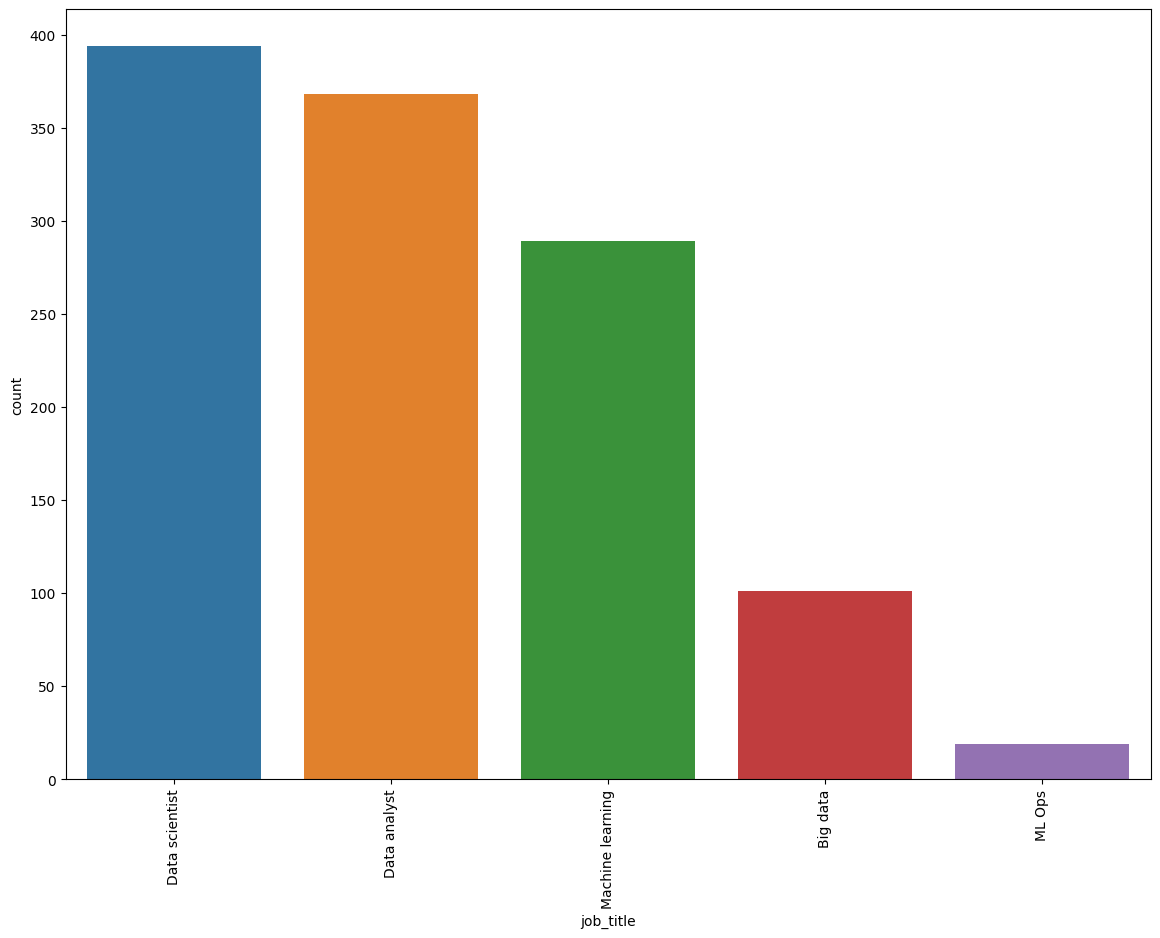

In [17]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=90)
sns.countplot(x = 'job_title',
              data = df,
              order = df['job_title'].value_counts().index)
plt.show()

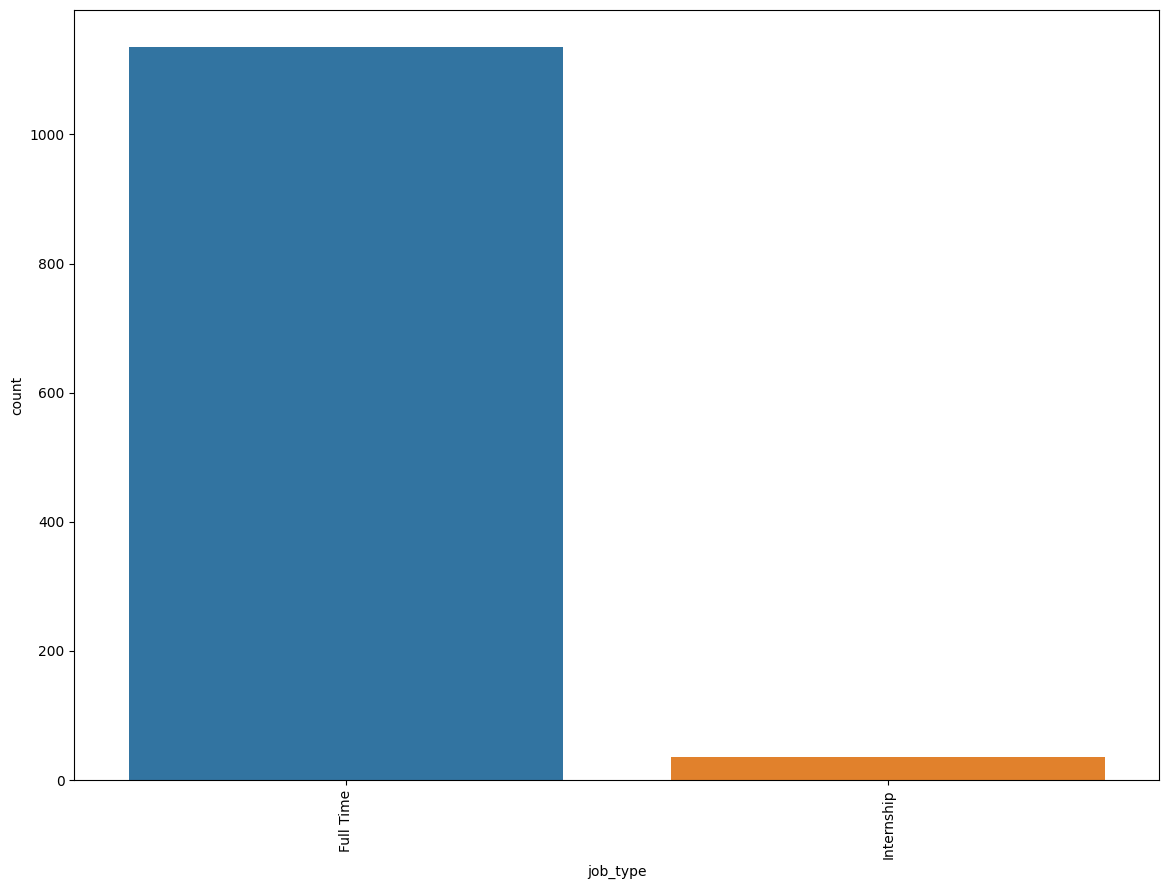

In [18]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=90)
sns.countplot(x = 'job_type',
              data = df,
              order = df['job_type'].value_counts().index)
plt.show()

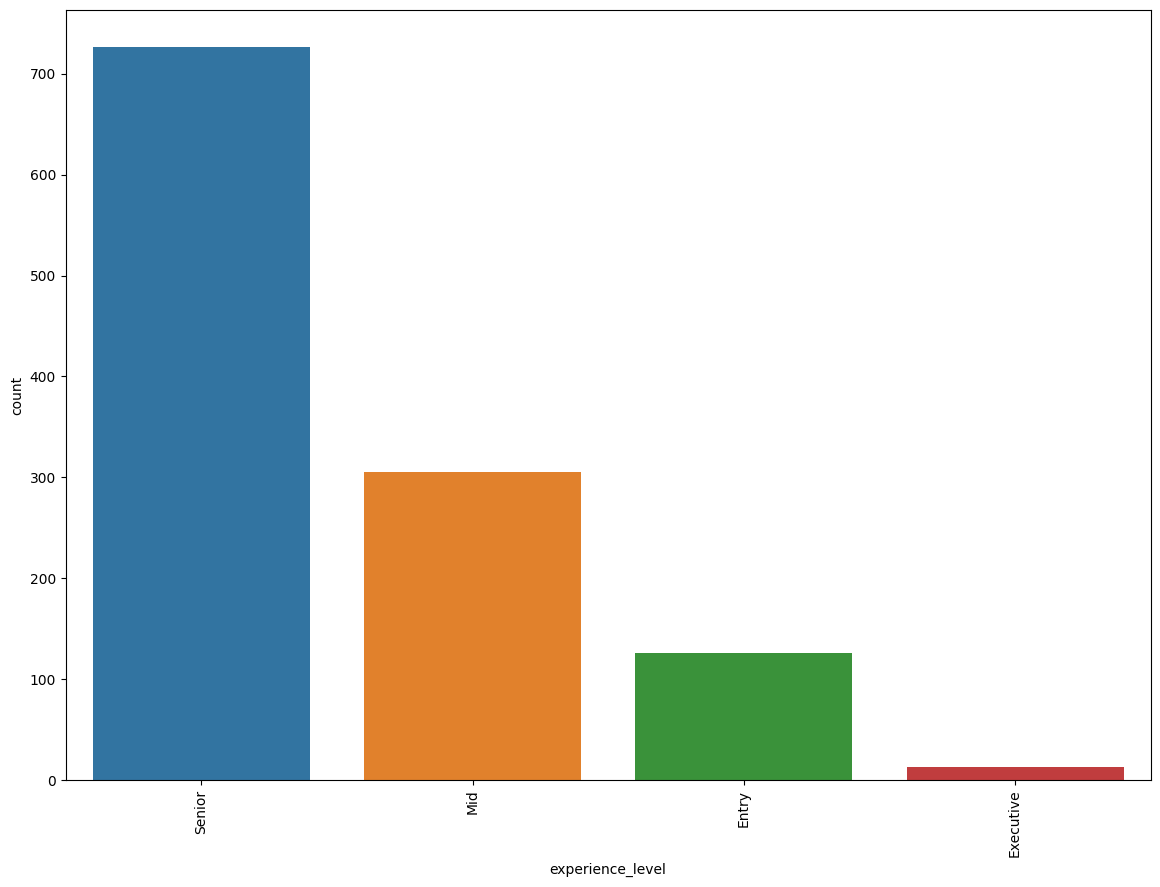

In [19]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=90)
sns.countplot(x = 'experience_level',
              data = df,
              order = df['experience_level'].value_counts().index)
plt.show()


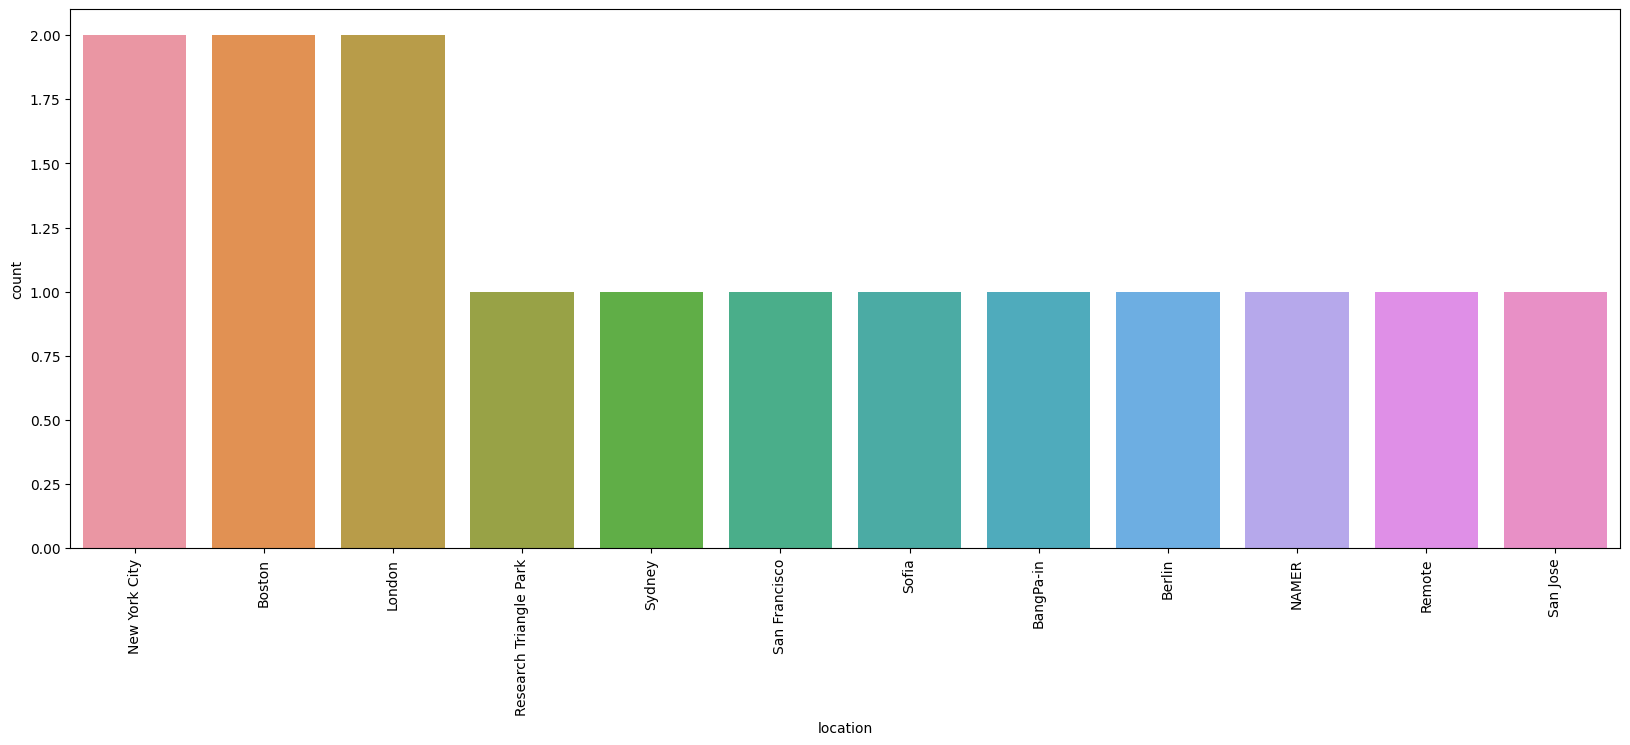

In [22]:
plt.figure(figsize=(20,7))
sns.countplot(x=df['location'].head(15))
plt.title("")
plt.xticks(rotation=90);

En Ã§ok veri bilimci New York City'de Ã§alÄ±ÅŸmakta.

In [24]:
grouped_data = df.groupby(['job_title'])['salary'].mean().reset_index()

In [25]:
grouped_data

job_title        salary
0          Big data  57514.851485
1      Data analyst  60812.500000
2    Data scientist  67065.989848
3            ML Ops  81263.157895
4  Machine learning  68397.923875

<AxesSubplot: xlabel='job_title', ylabel='salary'>

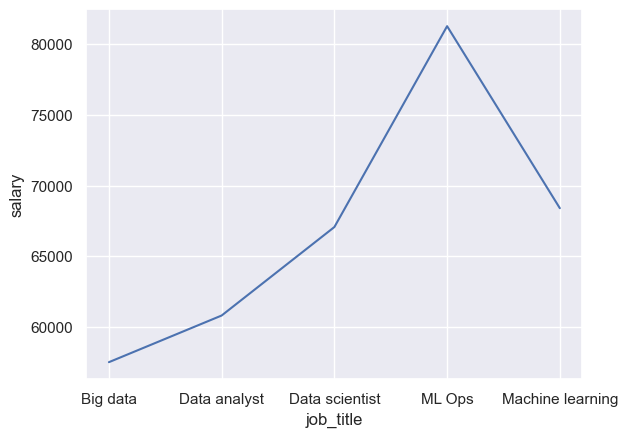

In [27]:
sns.set(style="darkgrid")
sns.lineplot(x="job_title", y="salary", data=grouped_data)

MaaÅŸ ortalamasÄ± en yÃ¼ksek olan ML Ops gÃ¶revinde bulunan kiÅŸiler olduÄŸunu gÃ¶rÃ¼yoruz.

### ðŸ¤– Machine Learning - Regression

In [29]:
df=pd.get_dummies(df,drop_first=True)

In [30]:
x=df.drop("salary",axis=1)
y=df[["salary"]]

In [34]:
df

salary  job_title_Data analyst  job_title_Data scientist  \
0     149000                       0                         1   
1     120000                       0                         1   
2      68000                       0                         1   
3     120000                       0                         1   
4     149000                       0                         1   
...      ...                     ...                       ...   
1166  228000                       0                         0   
1167  115000                       0                         0   
1168   76000                       0                         0   
1169   68000                       0                         0   
1170  135000                       0                         0   

      job_title_ML Ops  job_title_Machine learning  job_type_Internship  \
0                    0                           0                    0   
1                    0                           0                    0   
2                    0                           0                    0   
3                    0                           0                    0   
4                    0                           0                    0   
...                ...                         ...                  ...   
1166                 1                           0                    0   
1167                 1                           0                    0   
1168                 1                           0                    0   
1169                 1                           0                    0   
1170                 1                           0                    1   

      experience_level_Executive  experience_level_Mid  \
0                              0                     0   
1                              0                     0   
2                              0                     0   
3                              0                     0   
4                              0                     0   
...                          ...                   ...   
1166                           0                     0   
1167                           0                     0   
1168                           0                     0   
1169                           0                     0   
1170                           0                     0   

      experience_level_Senior  location_Aberdeen  ...  location_Wien  \
0                           1                  0  ...              0   
1                           1                  0  ...              0   
2                           1                  0  ...              0   
3                           1                  0  ...              0   
4                           1                  0  ...              0   
...                       ...                ...  ...            ...   
1166                        1                  0  ...              0   
1167                        1                  0  ...              0   
1168                        1                  0  ...              0   
1169                        1                  0  ...              0   
1170                        1                  0  ...              0   

      location_Wilmington  location_Work from Home  location_WrocÅ‚aw  \
0                       0                        0                 0   
1                       0                        0                 0   
2                       0                        0                 0   
3                       0                        0                 0   
4                       0                        0                 0   
...                   ...                      ...               ...   
1166                    0                        0                 0   
1167                    0                        0                 0   
1168                    0                        0                 0   
1169                    0    

In [31]:
def regression(x,y):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Lasso,Ridge
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    
    Li=LinearRegression()
    La=Lasso()
    Ri=Ridge()
    EL=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KNR=KNeighborsRegressor()
    
    model_array=[Li,La,Ri,EL,ETR,GBR,KNR]
    model_names=["LinearRegression","Lasso","Ridge","ElasticNet","ExtraTreeRegressor","GradientBoostingRegressor","KNeighborsRegressor"]
    
    
    mean_squared_array=[]
    r2_score_array=[]
    mean_absolute_array=[]
    
    result=pd.DataFrame(columns=["mean_squared_error","r2_score","mean_absolute_error"],index=model_names)
    
    for i in model_array:
        i.fit(x_train,y_train)
        pred_i=i.predict(x_test)
        mean_squared_array.append((mean_squared_error(y_test,pred_i)**0.5))
        r2_score_array.append(r2_score(y_test,pred_i))
        mean_absolute_array.append(mean_absolute_error(y_test,pred_i))
        
    result.mean_squared_error=mean_squared_array
    result.r2_score=r2_score_array
    result.mean_absolute_error=mean_absolute_array
    
    return result.sort_values("r2_score",ascending=False)

In [32]:
regression(x,y)

C:\Users\BA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean_squared_error      r2_score  \
Lasso                            2.611924e+04  5.011567e-01   
Ridge                            2.652476e+04  4.855465e-01   
GradientBoostingRegressor        2.831121e+04  4.139159e-01   
KNeighborsRegressor              2.973680e+04  3.534064e-01   
ExtraTreeRegressor               3.032123e+04  3.277412e-01   
ElasticNet                       3.535257e+04  8.612856e-02   
LinearRegression                 2.440686e+17 -4.355788e+25   

                           mean_absolute_error  
Lasso                             1.512530e+04  
Ridge                             1.561577e+04  
GradientBoostingRegressor         1.654528e+04  
KNeighborsRegressor               1.802553e+04  
ExtraTreeRegressor                1.354352e+04  
ElasticNet                        2.240426e+04  
LinearRegression                  6.388913e+16

### ðŸ¤– Deep Learning

In [36]:
model=Sequential()
model.add(Dense(81,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(42,activation="relu"))
model.add(Dense(21,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [37]:
history=model.fit(x,y,validation_split=0.20, batch_size=128,epochs=500)

Epoch 1/500
8/8 [==============================] - 1s 30ms/step - loss: 5082435584.0000 - val_loss: 5979303936.0000
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 5082425344.0000 - val_loss: 5979289600.0000
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 5082405888.0000 - val_loss: 5979259392.0000
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 5082358784.0000 - val_loss: 5979173376.0000
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 5082226176.0000 - val_loss: 5978944000.0000
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 5081891328.0000 - val_loss: 5978401280.0000
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 5081124864.0000 - val_loss: 5977162240.0000
Epoch 8/500
8/8 [==============================] - 0s 6ms/step - loss: 5079398912.0000 - val_loss: 5974481408.0000
Epoch 9/500
8/8 [==============================] - 0s 6ms/step - loss: 50758630

In [38]:
loss_df=pd.DataFrame(model.history.history)

<AxesSubplot: >

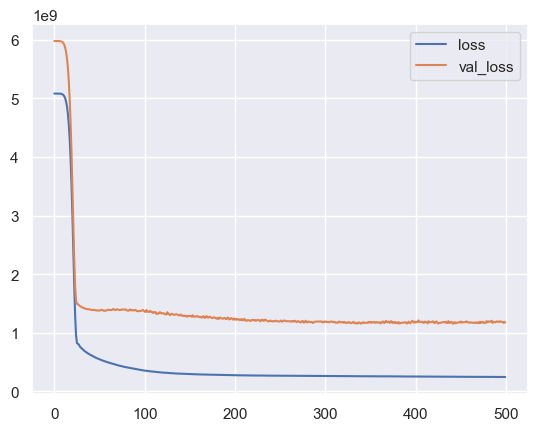

In [39]:
loss_df.plot()

In [40]:
tahmin=model.predict(x)

37/37 [==============================] - 0s 1ms/step


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
r2_score(tahmin,y)

0.39533857293226615

In [43]:
(mean_squared_error(tahmin,y))**0.5

20794.525046296025